# Imports

In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fetch data

In [2]:
gene_info = pd.read_csv("gene_info_some_genes.txt", sep='\t',header=0)
len(gene_info["Gene name"])

61

In [3]:
nbr_genes=len(gene_info["Gene name"])
max_corr=pd.DataFrame(np.zeros([nbr_genes,nbr_genes]), index=gene_info["Gene name"], columns=gene_info["Gene name"])
nbr_signif_corr=pd.DataFrame(np.zeros([nbr_genes,nbr_genes]), index=gene_info["Gene name"], columns=gene_info["Gene name"])
sign_cutoff=0.1550258
gene_index=0
gene_info["Gene name"]
for gene in gene_info["Gene name"]:
    gene_folder=glob.glob("correlations/correlations_*_*_"+gene+"/")
    #print(gene_folder)
    if len(gene_folder) ==1 :
        sub_gene_index=0
        for sub_gene in gene_info["Gene name"]:
            sub_gene_file=glob.glob(gene_folder[0]+sub_gene+".csv.gz")
            #print(sub_gene_file)
            if len(sub_gene_file) ==1 :
                my_data = pd.read_csv(sub_gene_file[0], sep=',',header=0,index_col=0)
                max_corr.values[gene_index,sub_gene_index]=my_data.abs().max().max()
                nbr_signif_corr.values[gene_index,sub_gene_index]=np.sum(((my_data.abs())>sign_cutoff).values)
            sub_gene_index+=1
    gene_index+=1
max_corr.shape

"""
for gene in sorted(glob.glob("correlations/correlations_*_*_*/")):
    break
    gene_index+=1
max_corr.shape"""

'\nfor gene in sorted(glob.glob("correlations/correlations_*_*_*/")):\n    break\n    gene_index+=1\nmax_corr.shape'

## Show data

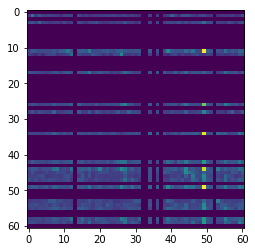

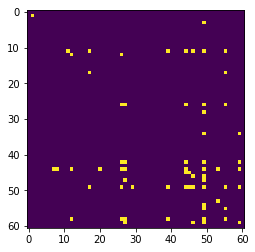

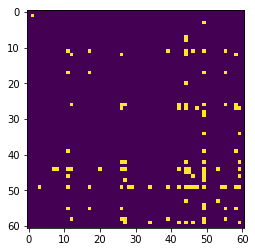

In [4]:
plt.imshow(max_corr.values)
plt.show()
plt.imshow(max_corr.values>0.3)
plt.show()
plt.imshow((max_corr.values>0.3) | np.transpose(max_corr.values>0.3))
plt.show()

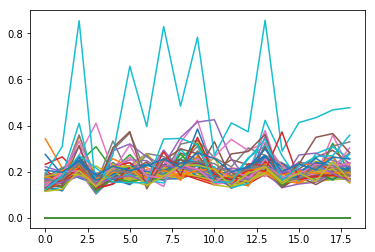

In [5]:
plt.plot(np.delete(max_corr.values,np.where(np.sum(max_corr.values!=0, axis=1)==0),axis=0))
plt.show()

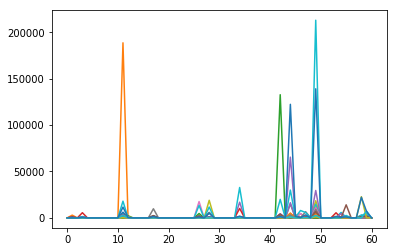

In [6]:
plt.plot(nbr_signif_corr.values)
plt.show()

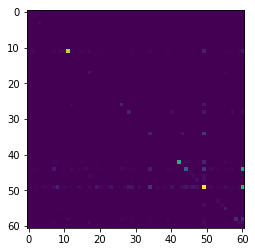

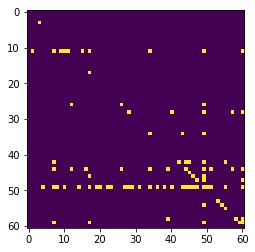

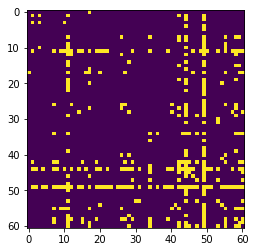

In [7]:
plt.imshow(nbr_signif_corr.values)
plt.show()
plt.imshow(nbr_signif_corr.values>3000)
plt.show()
plt.imshow((nbr_signif_corr.values>1000) | np.transpose(nbr_signif_corr.values>1000))
plt.show()

## Import and define functions

In [8]:
import networkx as nx
from matplotlib import pyplot, patches
import numpy as np

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx-0.5, current_idx-0.5),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)

## Define graph for max_corr

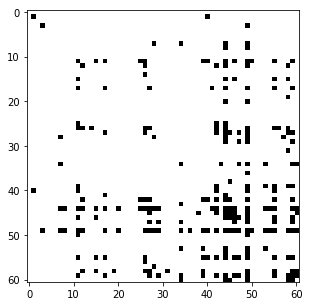

In [9]:
cutoff=0.25
G = nx.from_numpy_matrix((max_corr.values>cutoff) | np.transpose(max_corr.values>cutoff))

draw_adjacency_matrix(G)

## Define graph for nbr_signif_corr

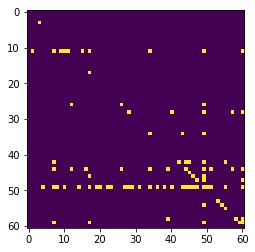

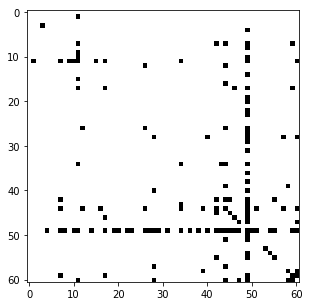

In [10]:
cutoff=3000
G = nx.from_numpy_matrix((nbr_signif_corr.values>cutoff) | np.transpose(nbr_signif_corr.values>cutoff))

plt.imshow(nbr_signif_corr.values>3000)
plt.show()

draw_adjacency_matrix(G)

## Run Louvain on whole data

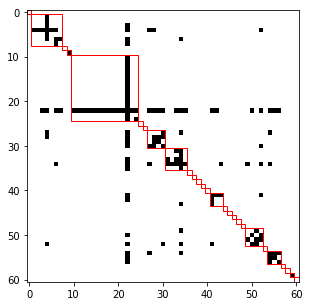

In [11]:
import numpy as np
from collections import defaultdict

import community #https://github.com/taynaud/python-louvain

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
louvain_comms_big=[]
for commun in louvain_comms:
    louvain_comms_big.append(list(nbr_signif_corr.columns[commun]))

In [12]:
#print(louvain_comms)
#print(nbr_signif_corr.columns)
for commun in louvain_comms:
    print(nbr_signif_corr.columns[commun])

Index(['MAFK'], dtype='object', name='Gene name')
Index(['MAFF', 'NR3C1', 'ESRRA', 'BIN1', 'NFKB1', 'NFYA', 'ZBTB33'], dtype='object', name='Gene name')
Index(['MAX'], dtype='object', name='Gene name')
Index(['ATF3'], dtype='object', name='Gene name')
Index(['SREBF1', 'SREBF2', 'ELK4', 'IRF4', 'EP300', 'IRF1', 'E2F1', 'CTCF',
       'REST', 'EGR1', 'PRDM1', 'E2F4', 'FOXA2', 'SPI1', 'GABPA'],
      dtype='object', name='Gene name')
Index(['NRF1'], dtype='object', name='Gene name')
Index(['ETS1'], dtype='object', name='Gene name')
Index(['YY1', 'SRF', 'TCF12', 'TFAP2A'], dtype='object', name='Gene name')
Index(['MEF2C', 'USF1', 'SP1', 'ZEB1', 'ZBTB7A'], dtype='object', name='Gene name')
Index(['FOXA1'], dtype='object', name='Gene name')
Index(['HSF1'], dtype='object', name='Gene name')
Index(['RXRA'], dtype='object', name='Gene name')
Index(['BRCA1'], dtype='object', name='Gene name')
Index(['RFX5'], dtype='object', name='Gene name')
Index(['STAT1', 'MYC', 'NR2C2'], dtype='object', name=

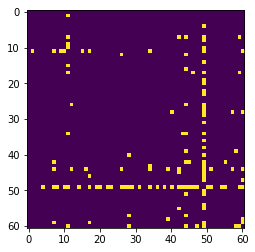

Index(['MAFK', 'MAFF', 'MAX', 'ATF3', 'SREBF1', 'NRF1', 'ETS1', 'YY1',
       'SREBF2', 'NR3C1', 'ESRRA', 'BIN1', 'MEF2C', 'FOXA1', 'ELK4', 'NFKB1',
       'USF1', 'SRF', 'HSF1', 'IRF4', 'EP300', 'RXRA', 'IRF1', 'E2F1', 'BRCA1',
       'RFX5', 'SP1', 'CTCF', 'STAT1', 'REST', 'POU2F2', 'EGR1', 'TFAP2C',
       'NFE2', 'NFYA', 'HNF4A', 'PRDM1', 'TAL1', 'E2F4', 'CEBPB', 'MYC',
       'IRF3', 'ZNF143', 'ZBTB33', 'ZEB1', 'BHLHE40', 'TCF12', 'STAT3', 'TBP',
       'FOXA2', 'SPI1', 'ZBTB7A', 'GATA2', 'ELF1', 'GABPA', 'EBF1', 'HEY1',
       'NR2C2', 'MEF2A', 'TFAP2A', 'PAX5'],
      dtype='object', name='Gene name')


/home/antoine/mit_internship/miniconda3/envs/kipoi-DeepSEA__predict/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


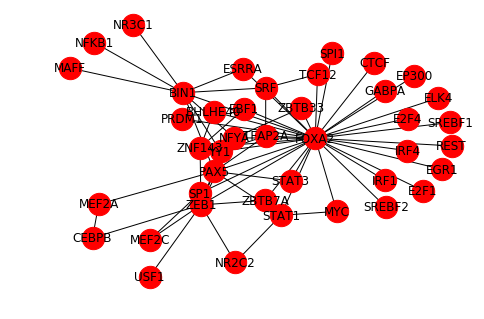

In [13]:
import matplotlib.pyplot as plt
import networkx as nx

def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    #edges = zip(labs[rows.tolist()], labs[cols.tolist()])
    edges = zip(gene_names[rows.tolist()], gene_names[cols.tolist()])
    #print(labs[rows.tolist()])
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, with_labels=True)
    #nx.draw(gr, node_size=500, labels=mylabels, with_labels=True)
    plt.show()

#adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool)
adjacency_matrix = (nbr_signif_corr.values>cutoff) | np.transpose(nbr_signif_corr.values>cutoff)
np.fill_diagonal(adjacency_matrix,0)


#adjacency_matrix=np.delete(np.delete(adjacency_matrix,13,axis=0),13,axis=1)
plt.imshow(adjacency_matrix)
plt.show()
genes_to_drop=([np.sum(adjacency_matrix!=0, axis=1)<1])
genes_to_drop=list(np.where(genes_to_drop[0])[0])
#rm FOXA2
genes_to_drop.append(13)
gene_names=nbr_signif_corr.columns
print(gene_names)
gene_names=(gene_names.drop(gene_names[genes_to_drop]))
adjacency_matrix=np.delete(np.delete(adjacency_matrix,genes_to_drop,axis=0),genes_to_drop,axis=1)

genes_to_drop=([np.sum(adjacency_matrix!=0, axis=1)<1])
genes_to_drop=list(np.where(genes_to_drop[0])[0])
gene_names=(gene_names.drop(gene_names[genes_to_drop]))
adjacency_matrix=np.delete(np.delete(adjacency_matrix,genes_to_drop,axis=0),genes_to_drop,axis=1)


show_graph_with_labels(adjacency_matrix)

In [13]:
"""nbr_genes=len(gene_info["Gene name"])
max_corr=pd.DataFrame(np.zeros([nbr_genes,nbr_genes]), index=gene_info["Gene name"], columns=gene_info["Gene name"])
nbr_signif_corr=pd.DataFrame(np.zeros([nbr_genes,nbr_genes]), index=gene_info["Gene name"], columns=gene_info["Gene name"])
sign_cutoff=0.1550258
gene_index=0
gene_info["Gene name"]
for gene in gene_info["Gene name"]:
    gene_folder=glob.glob("correlations/correlations_*_*_"+gene+"/")
    #print(gene_folder)
    if len(gene_folder) ==1 :
        sub_gene_index=0
        for sub_gene in gene_info["Gene name"]:
            sub_gene_file=glob.glob(gene_folder[0]+sub_gene+".csv.gz")
            #print(sub_gene_file)
            if len(sub_gene_file) ==1 :
                my_data = pd.read_csv(sub_gene_file[0], sep=',',header=0,index_col=0)
                max_corr.values[gene_index,sub_gene_index]=my_data.abs().max().max()
                nbr_signif_corr.values[gene_index,sub_gene_index]=np.sum(((my_data.abs())>sign_cutoff).values)
            sub_gene_index+=1
    gene_index+=1
max_corr.shape
"""
"""
for gene in sorted(glob.glob("correlations/correlations_*_*_*/")):
    break
    gene_index+=1
max_corr.shape"""

'\nfor gene in sorted(glob.glob("correlations/correlations_*_*_*/")):\n    break\n    gene_index+=1\nmax_corr.shape'

## Delete not important data info

In [14]:
genes_to_drop=(max_corr.columns[np.sum(max_corr.values!=0, axis=1)==0])
max_corr=max_corr.drop(genes_to_drop,axis=0).drop(genes_to_drop,axis=1)

genes_to_drop=(nbr_signif_corr.columns[np.sum(nbr_signif_corr.values!=0, axis=1)==0])
nbr_signif_corr=nbr_signif_corr.drop(genes_to_drop,axis=0).drop(genes_to_drop,axis=1)

#np.delete(np.delete(max_corr.values, np.where(np.sum(max_corr.values!=0, axis=1)==0),axis=0), np.where(np.sum(max_corr.values!=0, axis=1)==0),axis=0)
#nbr_signif_corr.values

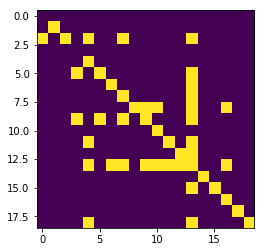

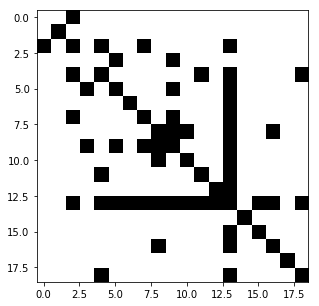

In [15]:
cutoff=3000
G = nx.from_numpy_matrix((nbr_signif_corr.values>cutoff) | np.transpose(nbr_signif_corr.values>cutoff))

plt.imshow(nbr_signif_corr.values>3000)
plt.show()

draw_adjacency_matrix(G)

## Run Louvain on part of data

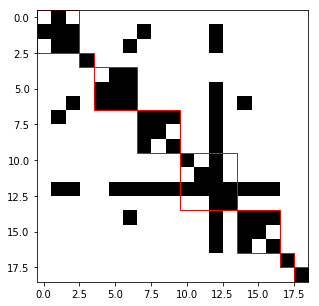

In [16]:
import numpy as np
from collections import defaultdict

import community

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
louvain_comms_small=[]
for commun in louvain_comms:
    louvain_comms_small.append(list(nbr_signif_corr.columns[commun]))

In [42]:
#print(louvain_comms)
#print(nbr_signif_corr.columns)
for commun in louvain_comms:
    if len(commun) != 1 :
        print(nbr_signif_corr.columns[commun])

Index(['MAFF', 'BIN1', 'NFYA'], dtype='object', name='Gene name')
Index(['ATF3'], dtype='object', name='Gene name')
Index(['MEF2C', 'SP1', 'ZEB1'], dtype='object', name='Gene name')
Index(['SRF', 'TCF12', 'TFAP2A'], dtype='object', name='Gene name')
Index(['STAT1', 'STAT3', 'FOXA2', 'GABPA'], dtype='object', name='Gene name')
Index(['ZNF143', 'BHLHE40', 'EBF1'], dtype='object', name='Gene name')
Index(['ELF1'], dtype='object', name='Gene name')
Index(['MEF2A'], dtype='object', name='Gene name')


In [18]:
community.modularity(louvain_community_dict,G)

0.5034013605442177

In [39]:
nodes_louvain_ordered

[0, 2, 7, 1, 3, 5, 9, 4, 11, 18, 6, 12, 13, 15, 8, 10, 16, 14, 17]

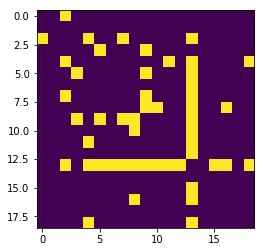

Index(['MAFF', 'ATF3', 'BIN1', 'MEF2C', 'SRF', 'SP1', 'STAT1', 'NFYA',
       'ZNF143', 'ZEB1', 'BHLHE40', 'TCF12', 'STAT3', 'FOXA2', 'ELF1', 'GABPA',
       'EBF1', 'MEF2A', 'TFAP2A'],
      dtype='object', name='Gene name')


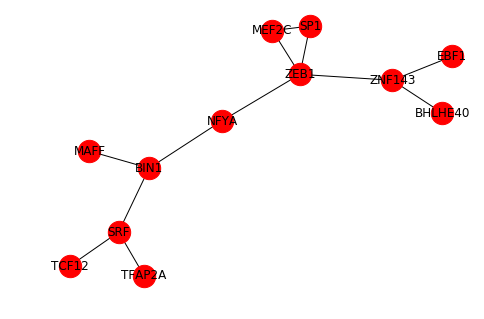

In [102]:
import matplotlib.pyplot as plt
import networkx as nx

def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    #edges = zip(labs[rows.tolist()], labs[cols.tolist()])
    edges = zip(gene_names[rows.tolist()], gene_names[cols.tolist()])
    #print(labs[rows.tolist()])
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, with_labels=True)
    #nx.draw(gr, node_size=500, labels=mylabels, with_labels=True)
    plt.show()

#adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool)
adjacency_matrix = (nbr_signif_corr.values>cutoff) | np.transpose(nbr_signif_corr.values>cutoff)
np.fill_diagonal(adjacency_matrix,0)


#adjacency_matrix=np.delete(np.delete(adjacency_matrix,13,axis=0),13,axis=1)
plt.imshow(adjacency_matrix)
plt.show()
genes_to_drop=([np.sum(adjacency_matrix!=0, axis=1)<1])
genes_to_drop=list(np.where(genes_to_drop[0])[0])
#rm FOXA2
genes_to_drop.append(13)
gene_names=nbr_signif_corr.columns
print(gene_names)
gene_names=(gene_names.drop(gene_names[genes_to_drop]))
adjacency_matrix=np.delete(np.delete(adjacency_matrix,genes_to_drop,axis=0),genes_to_drop,axis=1)

genes_to_drop=([np.sum(adjacency_matrix!=0, axis=1)<1])
genes_to_drop=list(np.where(genes_to_drop[0])[0])
gene_names=(gene_names.drop(gene_names[genes_to_drop]))
adjacency_matrix=np.delete(np.delete(adjacency_matrix,genes_to_drop,axis=0),genes_to_drop,axis=1)


show_graph_with_labels(adjacency_matrix)

## Determine cut_off (where modularity is biggest)

In [19]:
modularity={}
for cutoff in range(1,20000):
    G = nx.from_numpy_matrix((nbr_signif_corr.values>cutoff) | np.transpose(nbr_signif_corr.values>cutoff))

    #draw_adjacency_matrix(G)
    # Run louvain community finding algorithm
    louvain_community_dict = community.best_partition(G)

    # Convert community assignmet dict into list of communities
    louvain_comms = defaultdict(list)
    for node_index, comm_id in louvain_community_dict.items():
        louvain_comms[comm_id].append(node_index)
    louvain_comms = louvain_comms.values()

    nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
    #draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])

    modularity[cutoff]= [cutoff,community.modularity(louvain_community_dict,G)]

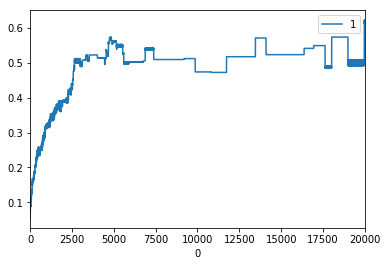

In [20]:
pd.DataFrame.from_dict(modularity).T.plot(x=0,y=1)
plt.show()

## Test consistency of graph

In [21]:
from math import log

def variation_of_information(X, Y):
  n = float(sum([len(x) for x in X]))
  sigma = 0.0
  for x in X:
    p = len(x) / n
    for y in Y:
      q = len(y) / n
      r = len(set(x) & set(y)) / n
      if r > 0.0:
        sigma += r * (log(r / p, 2) + log(r / q, 2))
  return abs(sigma)

In [37]:
"""X1 = [ ["g",2,3,4,5], [6,7,8,9,10] ]
Y1 = [ [6,7,8,9,10], [2,3,4,5] ]
print(variation_of_information(X1, Y1))
# VI = 0"""

'X1 = [ ["g",2,3,4,5], [6,7,8,9,10] ]\nY1 = [ [6,7,8,9,10], [2,3,4,5] ]\nprint(variation_of_information(X1, Y1))\n# VI = 0'

In [23]:
X4 = [ [1,3],[2,4] ]
Y4 = [ [1,2], [3,4]]
print(variation_of_information(X4, Y4))
# VI = 3.322 (maximum VI is log(N) = log(4) = 1.3862943611198906)

2.0


In [36]:
log(4)

1.3862943611198906

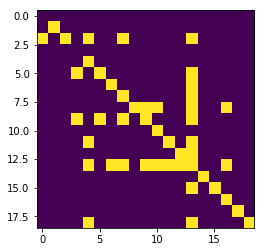

0.0


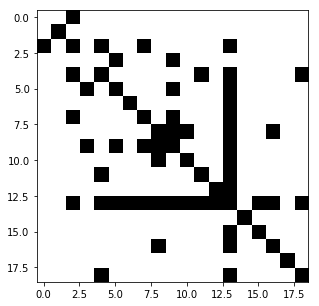

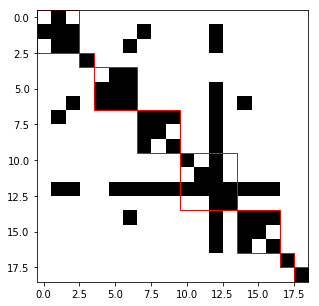

In [25]:
import random
cutoff=3000

G = nx.from_numpy_matrix((nbr_signif_corr.values>cutoff) | np.transpose(nbr_signif_corr.values>cutoff))

plt.imshow(nbr_signif_corr.values>cutoff)
plt.show()

draw_adjacency_matrix(G)

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
louvain_comms_small_old=louvain_comms_small
louvain_comms_small=[]
for commun in louvain_comms:
    louvain_comms_small.append(list(nbr_signif_corr.columns[commun]))

print(variation_of_information(louvain_comms_small_old, louvain_comms_small))

In [26]:
print(louvain_comms_big)
print(louvain_comms_small)

[['MAFK'], ['MAFF', 'NR3C1', 'ESRRA', 'BIN1', 'NFKB1', 'NFYA', 'ZBTB33'], ['MAX'], ['ATF3'], ['SREBF1', 'SREBF2', 'ELK4', 'IRF4', 'EP300', 'IRF1', 'E2F1', 'CTCF', 'REST', 'EGR1', 'PRDM1', 'E2F4', 'FOXA2', 'SPI1', 'GABPA'], ['NRF1'], ['ETS1'], ['YY1', 'SRF', 'TCF12', 'TFAP2A'], ['MEF2C', 'USF1', 'SP1', 'ZEB1', 'ZBTB7A'], ['FOXA1'], ['HSF1'], ['RXRA'], ['BRCA1'], ['RFX5'], ['STAT1', 'MYC', 'NR2C2'], ['POU2F2'], ['TFAP2C'], ['NFE2'], ['HNF4A'], ['TAL1'], ['CEBPB', 'STAT3', 'MEF2A', 'PAX5'], ['IRF3'], ['ZNF143', 'BHLHE40', 'EBF1'], ['TBP'], ['GATA2'], ['ELF1'], ['HEY1']]
[['MAFF', 'BIN1', 'NFYA'], ['ATF3'], ['MEF2C', 'SP1', 'ZEB1'], ['SRF', 'TCF12', 'TFAP2A'], ['STAT1', 'STAT3', 'FOXA2', 'GABPA'], ['ZNF143', 'BHLHE40', 'EBF1'], ['ELF1'], ['MEF2A']]


In [27]:
print(variation_of_information(louvain_comms_big, louvain_comms_small))

0.4019988563325031


In [28]:
log(19)

2.9444389791664403

In [29]:
louvain_comms_big_filtered=[]
for x in louvain_comms_big:
    for y in x:
        if y not in [item for sublist in louvain_comms_small for item in sublist]:
            x.remove(y)
    if len(x) > 0:
        louvain_comms_big_filtered.append(x)
print(louvain_comms_big_filtered)
print(louvain_comms_small)

[['MAFF', 'ESRRA', 'BIN1', 'NFYA'], ['ATF3'], ['SREBF2', 'IRF4', 'IRF1', 'CTCF', 'EGR1', 'E2F4', 'FOXA2', 'GABPA'], ['SRF', 'TCF12', 'TFAP2A'], ['MEF2C', 'SP1', 'ZEB1'], ['STAT1', 'NR2C2'], ['STAT3', 'MEF2A'], ['ZNF143', 'BHLHE40', 'EBF1'], ['ELF1']]
[['MAFF', 'BIN1', 'NFYA'], ['ATF3'], ['MEF2C', 'SP1', 'ZEB1'], ['SRF', 'TCF12', 'TFAP2A'], ['STAT1', 'STAT3', 'FOXA2', 'GABPA'], ['ZNF143', 'BHLHE40', 'EBF1'], ['ELF1'], ['MEF2A']]


In [30]:
print(variation_of_information(louvain_comms_big_filtered, louvain_comms_small))

0.5275967591791308


In [31]:
log(19)

2.9444389791664403

In [32]:
sum(sum(nbr_signif_corr.values>3000))/(19*19)

0.13019390581717452

0.9076374998861332
2.9444389791664403


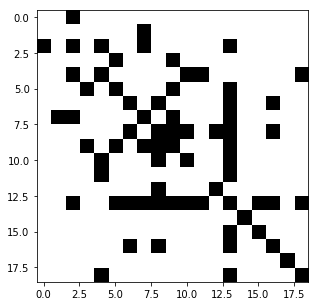

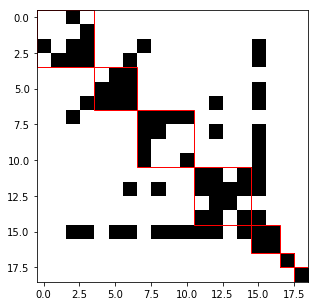

In [33]:
import random
cutoff=3000
nbr_signif_corr_noised=np.copy(nbr_signif_corr.values)
for i in range(10):
    nbr_signif_corr_noised_old=np.copy(nbr_signif_corr_noised)
    while (nbr_signif_corr_noised_old == nbr_signif_corr_noised).all():
        x,y=random.randrange(0,len(nbr_signif_corr_noised)),random.randrange(0,len(nbr_signif_corr_noised))
        nbr_signif_corr_noised[x,y]= (cutoff+1) if (random.random()<0.13 and nbr_signif_corr_noised[x,y]<=cutoff) else 0 if (random.random()>0.13 and nbr_signif_corr_noised[x,y]>cutoff) else nbr_signif_corr_noised[x,y]


G = nx.from_numpy_matrix((nbr_signif_corr_noised>cutoff) | np.transpose(nbr_signif_corr_noised>cutoff))

#plt.imshow(nbr_signif_corr.values>cutoff)
#plt.show()

draw_adjacency_matrix(G)

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
louvain_comms_small=[]
for commun in louvain_comms:
    louvain_comms_small.append(list(nbr_signif_corr.columns[commun]))

print(variation_of_information(louvain_comms_small_old, louvain_comms_small))
print(log(19))